In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the Wisconsin Breast Cancer dataset
WBCD = pd.read_csv("WisconsinBreastCancerDatabase.csv")
# Convert Diagnosis to 0 and 1.
WBCD.loc[WBCD['Diagnosis']=='B','Diagnosis']=0
WBCD.loc[WBCD['Diagnosis']=='M','Diagnosis']=1
WBCD

,ID,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave points worst,Symmetry worst,Fractal dimension worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
# Store relevant columns as variables
X = WBCD[['Radius mean']].values.reshape(-1, 1)
y = WBCD[['Diagnosis']].values.reshape(-1, 1).astype(int)

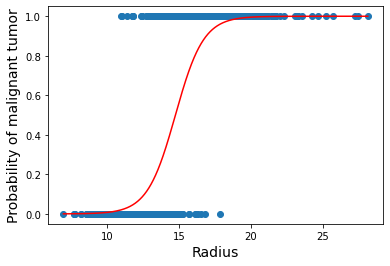

In [4]:
# Logistic regression predicting diagnosis from tumor radius
logisticModel = LogisticRegression()
logisticModel.fit(X,np.ravel(y.astype(int)))

# Graph logistic regression probabilities
plt.scatter(X,y)
xDelta = np.linspace(X.min(),X.max(),10000)
yPredicted = logisticModel.predict(X).reshape(-1,1).astype(int)
yDeltaProb = logisticModel.predict_proba(xDelta.reshape(-1,1))[:,1]
plt.plot(xDelta,yDeltaProb, color='red')
plt.xlabel('Radius',fontsize=14);
plt.ylabel('Probability of malignant tumor',fontsize=14);

In [5]:
# Display the slope parameter estimate
logisticModel.coef_

array([[1.02475609]])

In [6]:
# Display the intercept parameter estimate
logisticModel.intercept_

array([-15.120902])

In [7]:
# Predict the probability a tumor with radius mean 13 is benign / malignant
pHatProb = logisticModel.predict_proba([[13]])
pHatProb[0]

array([0.85803604, 0.14196396])

In [8]:
# Classify whether tumor with radius mean 13 is benign (0) or malignant (1)
pHat = logisticModel.predict([[13]])
pHat[0]

0

In [9]:
print("A tumor with radius mean 13 has predicted probability: \n", 
      pHatProb[0][0], "of being benign\n",
      pHatProb[0][1], "of being malignant\n",
     "and overall is classified to be benign")

A tumor with radius mean 13 has predicted probability: 
 0.8580360397248947 of being benign
 0.14196396027510533 of being malignant
 and overall is classified to be benign
